## Feedforward Neural Network

In [1]:
#standard imports and assertions
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
# to get same results across runs
np.random.seed(87)

In [2]:
import tensorflow as tf
from tensorflow import keras

Load the participants' data

In [3]:
#participants' data
data1 = pd.read_csv("participant1_marks.csv")
data2 = pd.read_csv("participant2_marks.csv")
data3 = pd.read_csv("participant3_marks.csv")
data4 = pd.read_csv("participant4_marks.csv")
data5 = pd.read_csv("participant5_marks.csv")
data6 = pd.read_csv("participant6_marks.csv")
data7 = pd.read_csv("participant7_marks.csv")
data8 = pd.read_csv("participant8_marks.csv")
data9 = pd.read_csv("participant9_marks.csv")
data10 = pd.read_csv("participant10_marks.csv")
data11 = pd.read_csv("participant11_marks.csv")
data12 = pd.read_csv("participant12_marks.csv")
data13 = pd.read_csv("participant13_marks.csv")
data14 = pd.read_csv("participant14_marks.csv")
data15 = pd.read_csv("participant15_marks.csv")
data16 = pd.read_csv("participant16_marks.csv")
part_data = [data1, data2, data3, data4, data5, data6, data7, data8,
             data9, data10, data11, data12, data13, data14, data15, data16]

Stimuli

In [4]:
stimuli = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

Duration of each excerpt

In [5]:
#time in seconds of each stimulus
s0 = 100
s1 = 83
s2 = 73
s3 = 146
s4 = 136
s5 = 101
s6 = 85
s7 = 117
s8 = 75
s9 = 89

total_secs = [s0, s1, s2, s3, s4, s5, s6, s7, s8, s9] #times in seconds for every stimulus

Load each of the excerpts' acoustic features

In [6]:
excerpt1 = pd.read_csv("excerpt1_features.csv")
excerpt2 = pd.read_csv("excerpt2_features.csv")
excerpt3 = pd.read_csv("excerpt3_features.csv")
excerpt4 = pd.read_csv("excerpt4_features.csv")
excerpt5 = pd.read_csv("excerpt5_features.csv")
excerpt6 = pd.read_csv("excerpt6_features.csv")
excerpt7 = pd.read_csv("excerpt7_features.csv")
excerpt8 = pd.read_csv("excerpt8_features.csv")
excerpt9 = pd.read_csv("excerpt9_features.csv")
excerpt10 = pd.read_csv("excerpt10_features.csv")
excerpt_features = [excerpt1,excerpt2,excerpt3,excerpt4,excerpt5,excerpt6,excerpt7,excerpt8,excerpt9,excerpt10]

Organize the data from the Participant to be the target array

In [7]:
dat = part_data[2]
arr2 = []
st = stimuli[1]
arr2_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_0.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_0.append(1)
    else:
        arr2_0.append(0)

st = stimuli[3]
arr2_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][11]-8 and (m*0.25) <= dat[st][11]+8:
        arr2_1.append(1)
    elif (m*0.25) >= dat[st][12]-8 and (m*0.25) <= dat[st][12]+8:
        arr2_1.append(1)
    else:
        arr2_1.append(0)

st = stimuli[5]
arr2_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][11]-8 and (m*0.25) <= dat[st][11]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][12]-8 and (m*0.25) <= dat[st][12]+8:
        arr2_2.append(1)
    elif (m*0.25) >= dat[st][13]-8 and (m*0.25) <= dat[st][13]+8:
        arr2_2.append(1)
    else:
        arr2_2.append(0)

st = stimuli[7]
arr2_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][11]-8 and (m*0.25) <= dat[st][11]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][12]-8 and (m*0.25) <= dat[st][12]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][13]-8 and (m*0.25) <= dat[st][13]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][14]-8 and (m*0.25) <= dat[st][14]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][15]-8 and (m*0.25) <= dat[st][15]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][16]-8 and (m*0.25) <= dat[st][16]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][17]-8 and (m*0.25) <= dat[st][17]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][18]-8 and (m*0.25) <= dat[st][18]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][19]-8 and (m*0.25) <= dat[st][19]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][20]-8 and (m*0.25) <= dat[st][20]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][21]-8 and (m*0.25) <= dat[st][21]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][22]-8 and (m*0.25) <= dat[st][22]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][23]-8 and (m*0.25) <= dat[st][23]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][24]-8 and (m*0.25) <= dat[st][24]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][25]-8 and (m*0.25) <= dat[st][25]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][26]-8 and (m*0.25) <= dat[st][26]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][27]-8 and (m*0.25) <= dat[st][27]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][28]-8 and (m*0.25) <= dat[st][28]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][29]-8 and (m*0.25) <= dat[st][29]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][30]-8 and (m*0.25) <= dat[st][30]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][31]-8 and (m*0.25) <= dat[st][31]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][32]-8 and (m*0.25) <= dat[st][32]+8:
        arr2_3.append(1)
    elif (m*0.25) >= dat[st][33]-8 and (m*0.25) <= dat[st][33]+8:
        arr2_3.append(1)
    else:
        arr2_3.append(0)

st = stimuli[8]
arr2_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_4.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_4.append(1)
    else:
        arr2_4.append(0)

st = stimuli[11]
arr2_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_5.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_5.append(1)
    else:
        arr2_5.append(0)

st = stimuli[13]
arr2_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_6.append(1)
    elif (m*0.25) >= dat[st][11]-8 and (m*0.25) <= dat[st][11]+8:
        arr2_6.append(1)
    else:
        arr2_6.append(0)

st = stimuli[15]
arr2_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][9]-8 and (m*0.25) <= dat[st][9]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][10]-8 and (m*0.25) <= dat[st][10]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][11]-8 and (m*0.25) <= dat[st][11]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][12]-8 and (m*0.25) <= dat[st][12]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][13]-8 and (m*0.25) <= dat[st][13]+8:
        arr2_7.append(1)
    elif (m*0.25) >= dat[st][14]-8 and (m*0.25) <= dat[st][14]+8:
        arr2_7.append(1)
    else:
        arr2_7.append(0)

st = stimuli[17]
arr2_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_8.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_8.append(1)
    else:
        arr2_8.append(0)
        
st = stimuli[19]
arr2_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr2_9.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr2_9.append(1)
    else:
        arr2_9.append(0)

arr2.append(arr2_0)
arr2.append(arr2_1)
arr2.append(arr2_2)
arr2.append(arr2_3)
arr2.append(arr2_4)
arr2.append(arr2_5)
arr2.append(arr2_6)
arr2.append(arr2_7)
arr2.append(arr2_8)
arr2.append(arr2_9)

In [8]:
dat = part_data[7]
arr7 = []
st = stimuli[1]
arr7_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr7_0.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr7_0.append(1)
    else:
        arr7_0.append(0)

st = stimuli[3]
arr7_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr7_1.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr7_1.append(1)
    else:
        arr7_1.append(0)

st = stimuli[5]
arr7_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_2.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_2.append(1)
    else:
        arr7_2.append(0)

st = stimuli[7]
arr7_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_3.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_3.append(1)
    else:
        arr7_3.append(0)

st = stimuli[9]
arr7_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_4.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_4.append(1)
    else:
        arr7_4.append(0)

st = stimuli[11]
arr7_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr7_5.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr7_5.append(1)
    else:
        arr7_5.append(0)

st = stimuli[13]
arr7_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_6.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_6.append(1)
    else:
        arr7_6.append(0)

st = stimuli[15]
arr7_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][6]-8 and (m*0.25) <= dat[st][6]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][7]-8 and (m*0.25) <= dat[st][7]+8:
        arr7_7.append(1)
    elif (m*0.25) >= dat[st][8]-8 and (m*0.25) <= dat[st][8]+8:
        arr7_7.append(1)
    else:
        arr7_7.append(0)

st = stimuli[17]
arr7_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_8.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_8.append(1)
    else:
        arr7_8.append(0)
        
st = stimuli[19]
arr7_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr7_9.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr7_9.append(1)
    else:
        arr7_9.append(0)

arr7.append(arr7_0)
arr7.append(arr7_1)
arr7.append(arr7_2)
arr7.append(arr7_3)
arr7.append(arr7_4)
arr7.append(arr7_5)
arr7.append(arr7_6)
arr7.append(arr7_7)
arr7.append(arr7_8)
arr7.append(arr7_9)

In [9]:
dat = part_data[6]
arr6 = []
st = stimuli[1]
arr6_0 = []
for m in range(total_secs[0]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_0.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr6_0.append(1)
    else:
        arr6_0.append(0)

st = stimuli[3]
arr6_1 = []
for m in range(total_secs[1]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_1.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_1.append(1)
    else:
        arr6_1.append(0)

st = stimuli[5]
arr6_2 = []
for m in range(total_secs[2]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_2.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_2.append(1)
    else:
        arr6_2.append(0)

st = stimuli[7]
arr6_3 = []
for m in range(total_secs[3]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_3.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr6_3.append(1)
    else:
        arr6_3.append(0)

st = stimuli[9]
arr6_4 = []
for m in range(total_secs[4]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_4.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_4.append(1)
    else:
        arr6_4.append(0)

st = stimuli[11]
arr6_5 = []
for m in range(total_secs[5]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_5.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_5.append(1)
    else:
        arr6_5.append(0)

st = stimuli[13]
arr6_6 = []
for m in range(total_secs[6]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_6.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_6.append(1)
    else:
        arr6_6.append(0)

st = stimuli[15]
arr6_7 = []
for m in range(total_secs[7]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_7.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_7.append(1)
    else:
        arr6_7.append(0)

st = stimuli[17]
arr6_8 = []
for m in range(total_secs[8]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][3]-8 and (m*0.25) <= dat[st][3]+8:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][4]-8 and (m*0.25) <= dat[st][4]+8:
        arr6_8.append(1)
    elif (m*0.25) >= dat[st][5]-8 and (m*0.25) <= dat[st][5]+8:
        arr6_8.append(1)
    else:
        arr6_8.append(0)
        
st = stimuli[19]
arr6_9 = []
for m in range(total_secs[9]*4):
    if (m*0.25) >= dat[st][0]-8 and (m*0.25) <= dat[st][0]+8:
        arr6_9.append(1)
    elif (m*0.25) >= dat[st][1]-8 and (m*0.25) <= dat[st][1]+8:
        arr6_9.append(1)
    elif (m*0.25) >= dat[st][2]-8 and (m*0.25) <= dat[st][2]+8:
        arr6_9.append(1)
    else:
        arr6_9.append(0)

arr6.append(arr6_0)
arr6.append(arr6_1)
arr6.append(arr6_2)
arr6.append(arr6_3)
arr6.append(arr6_4)
arr6.append(arr6_5)
arr6.append(arr6_6)
arr6.append(arr6_7)
arr6.append(arr6_8)
arr6.append(arr6_9)

Get target array, creating moving window, and split data

In [8]:
tot_x2,tot_y2 = [],[]

for s in range(len(arr2)):
    dat2 = part_data[2]
    x2,y2 = [],[]
    input_arr2 = np.asarray(excerpt_features[s])
    
    input_array2 = []
    target_array2 = arr2[s]
    
    new_target_array2 = []
    t=1
    k=10
    # construct moving window over 1-d array
    for i in range(int(len(target_array2))):
        inputs2 = input_arr2[i:(i+k)]
        if len(inputs2) != 0:
            input_array2.append(inputs2)
        target2 = target_array2[i]
        new_target_array2.append(target2)

    input_array_nd2 = np.asarray(input_array2)
    target_array_nd2 = np.asarray(new_target_array2)
    
    nrows2 = len(input_array_nd2)
    input_array_nd2 = input_array_nd2.reshape((nrows2,1))
    y2 = target_array_nd2.reshape((nrows2,1))

    x2 = []
    for i in range(len(input_array_nd2)):
        index2 = input_array_nd2[i][0][0]
        x2.append(index2)
    x2 = np.asarray(x2)
    
    x2 = list(x2)
    y2 = list(y2)
    
    tot_x2 += x2
    tot_y2 += y2

from sklearn.preprocessing import MinMaxScaler    

scaler = MinMaxScaler(feature_range=(0, 1))
dataset_x2 = scaler.fit_transform(tot_x2)
dataset_y2 = scaler.fit_transform(tot_y2)

tot_x2 = np.asarray(dataset_x2)
tot_y2 = np.asarray(dataset_y2)
split2 = int(len(x2)*0.8)
x2train = tot_x2[split2:]
y2train = tot_y2[split2:]
x2_test = tot_x2[:split2]
y2_test = tot_y2[:split2]
val2 = int(len(x2train)*0.95)
X2_train = x2train[:val2]
y2_train = y2train[:val2]
x2_val = x2train[val2:]
y2_val = y2train[val2:]

print("train:",len(X2_train),"\nvalid:",len(x2_val),"\ntest:",len(x2_test))

train: 3549 
valid: 187 
test: 284


In [41]:
tot_x7,tot_y7 = [],[]

for s in range(len(arr7)):
    dat7 = part_data[7]
    x7,y7 = [],[]
    input_arr7 = np.asarray(excerpt_features[s])
    
    input_array7 = []
    target_array7 = arr7[s]
    
    new_target_array7 = []
    t=1
    k=10
    # construct moving window over 1-d array
    for i in range(int(len(target_array7))):
        inputs7 = input_arr7[i:(i+k)]
        if len(inputs7) != 0:
            input_array7.append(inputs7)
        target7 = target_array7[i]
        new_target_array7.append(target7)

    input_array_nd7 = np.asarray(input_array7)
    target_array_nd7 = np.asarray(new_target_array7)
    
    nrows7 = len(input_array_nd7)
    input_array_nd7 = input_array_nd7.reshape((nrows7,1))
    y7 = target_array_nd7.reshape((nrows7,1))

    x7 = []
    for i in range(len(input_array_nd7)):
        index7 = input_array_nd7[i][0][0]
        x7.append(index7)
    x7 = np.asarray(x7)
    
    x7 = list(x7)
    y7 = list(y7)
    
    tot_x7 += x7
    tot_y7 += y7

tot_x7 = np.asarray(tot_x7)
tot_y7 = np.asarray(tot_y7)
split7 = int(len(x7)*0.8)
X7_train = tot_x7[:split7]
y7_train = tot_y7[:split7]
val7 = int(len(X7_train)*0.9)
x7_val = tot_x7[:val7]
y7_val = tot_y7[:val7]
x7_test = tot_x7[split7:]
y7_test = tot_y7[split7:]

In [42]:
tot_x6,tot_y6 = [],[]

for s in range(len(arr6)):
    dat6 = part_data[6]
    x6,y6 = [],[]
    input_arr6 = np.asarray(excerpt_features[s])
    
    input_array6 = []
    target_array6 = arr6[s]
    
    new_target_array6 = []
    t=1
    k=10
    # construct moving window over 1-d array
    for i in range(int(len(target_array6))):
        inputs6 = input_arr6[i:(i+k)]
        if len(inputs6) != 0:
            input_array6.append(inputs6)
        target6 = target_array6[i]
        new_target_array6.append(target6)

    input_array_nd6 = np.asarray(input_array6)
    target_array_nd6 = np.asarray(new_target_array6)
    
    nrows6 = len(input_array_nd6)
    input_array_nd6 = input_array_nd6.reshape((nrows6,1))
    y6 = target_array_nd6.reshape((nrows6,1))

    x6 = []
    for i in range(len(input_array_nd6)):
        index6 = input_array_nd6[i][0][0]
        x6.append(index6)
    x6 = np.asarray(x6)
    
    x6 = list(x6)
    y6 = list(y6)
    
    tot_x6 += x6
    tot_y6 += y6

tot_x6 = np.asarray(tot_x6)
tot_y6 = np.asarray(tot_y6)
split6 = int(len(x6)*0.8)
X6_train = tot_x6[:split6]
y6_train = tot_y6[:split6]
val6 = int(len(X6_train)*0.9)
x6_val = tot_x6[:val6]
y6_val = tot_y6[:val6]
x6_test = tot_x6[split6:]
y6_test = tot_y6[split6:]

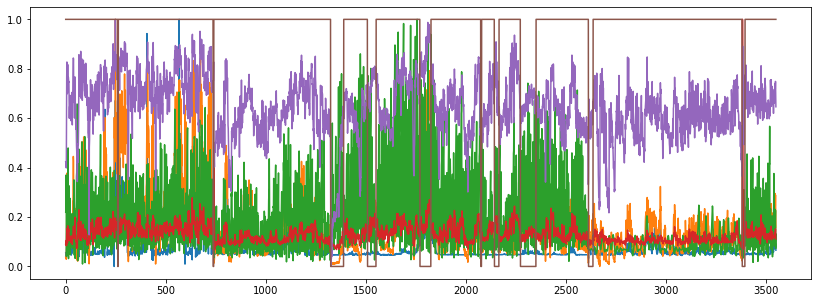

In [9]:
plt.figure(figsize=(14,5))
plt.plot(X2_train)
plt.plot(y2_train)
plt.show()

#### Model for Participant 3

Create sequential model

In [14]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[5, 1]))
model2.add(keras.layers.Dense(3, activation="tanh"))
model2.add(keras.layers.Dense(3, activation="tanh"))
model2.add(keras.layers.Dense(3, activation="softmax"))
model2.output_shape

(None, 3)

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [16]:
output2 = model2.layers[3]

Compile the model with early stopping and callbacks; the Adam (Adaptive Moment Estimation) optimizer is used with a learning rate of 0.001.

In [17]:
early_stopping_cb2 = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

checkpoint_cb2 = keras.callbacks.ModelCheckpoint("best.h5", save_best_only=True)

opt2 = keras.optimizers.Adam() #learning_rate = 0.001

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt2,
              metrics=["accuracy"])

model2.evaluate(x2_test, y2_test)

9/9 [==============================] - 0s 11ms/step - loss: 1.3667 - accuracy: 0.0035


[1.3667030334472656, 0.0035211266949772835]

Run the model

In [18]:
history2 = model2.fit(X2_train, y2_train, epochs=1000,
                    validation_data=(x2_val, y2_val),
                    callbacks=[checkpoint_cb2,early_stopping_cb2])

Epoch 1/1000
111/111 [==============================] - 1s 10ms/step - loss: 1.0507 - accuracy: 0.5213 - val_loss: 0.7252 - val_accuracy: 1.0000
Epoch 2/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.9107 - val_loss: 0.3589 - val_accuracy: 1.0000
Epoch 3/1000
111/111 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.9124 - val_loss: 0.2046 - val_accuracy: 1.0000
Epoch 4/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.3610 - accuracy: 0.9124 - val_loss: 0.1462 - val_accuracy: 1.0000
Epoch 5/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.9124 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 6/1000
111/111 [==============================] - 1s 5ms/step - loss: 0.3276 - accuracy: 0.9124 - val_loss: 0.1079 - val_accuracy: 1.0000
Epoch 7/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.9124 - val_loss: 0.1023 - val_accuracy

111/111 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9118 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 58/1000
111/111 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.9110 - val_loss: 0.0736 - val_accuracy: 1.0000


Plot the model's accuracy and loss

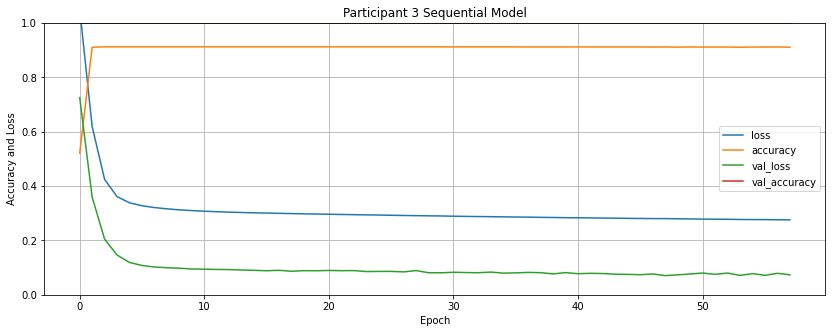

In [19]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Participant 3 Sequential Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loss")
plt.show()

Evaluate the model

In [20]:
model2.evaluate(x2_val, y2_val)

6/6 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 1.0000


[0.0705755352973938, 1.0]

In [21]:
model2.evaluate(x2_test, y2_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.9190


[0.27162158489227295, 0.9190140962600708]

#### Model for Participant 8

In [21]:
model7 = keras.models.Sequential()
model7.add(keras.layers.Flatten(input_shape=[3, 1]))
model7.add(keras.layers.Dense(3, activation="tanh"))
model7.add(keras.layers.Dense(3, activation="tanh"))
model7.add(keras.layers.Dense(3, activation="softmax"))
model7.output_shape

(None, 3)

In [22]:
model7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [23]:
output7 = model7.layers[3]

In [24]:
early_stopping_cb7 = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

checkpoint_cb7 = keras.callbacks.ModelCheckpoint("best.h5", save_best_only=True)

opt7 = keras.optimizers.Adam() #learning_rate = 0.001

model7.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt7,
              metrics=["accuracy"])

model7.evaluate(x7_test, y7_test)

117/117 [==============================] - 0s 1ms/step - loss: 1.1392 - accuracy: 0.4291


[1.139245867729187, 0.42906853556632996]

In [25]:
history7 = model7.fit(X7_train, y7_train, epochs=1000,
                    validation_data=(x7_val, y7_val),
                    callbacks=[checkpoint_cb7,early_stopping_cb7])

Epoch 1/1000
9/9 [==============================] - 0s 22ms/step - loss: 1.1239 - accuracy: 0.3486 - val_loss: 1.0995 - val_accuracy: 0.3804
Epoch 2/1000
9/9 [==============================] - 0s 11ms/step - loss: 1.0757 - accuracy: 0.3908 - val_loss: 1.0541 - val_accuracy: 0.4039
Epoch 3/1000
9/9 [==============================] - 0s 13ms/step - loss: 1.0279 - accuracy: 0.4296 - val_loss: 1.0089 - val_accuracy: 0.4353
Epoch 4/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.9813 - accuracy: 0.5000 - val_loss: 0.9621 - val_accuracy: 0.5020
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.9338 - accuracy: 0.5493 - val_loss: 0.9146 - val_accuracy: 0.5647
Epoch 6/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.8858 - accuracy: 0.6232 - val_loss: 0.8682 - val_accuracy: 0.6353
Epoch 7/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.8391 - accuracy: 0.6972 - val_loss: 0.8230 - val_accuracy: 0.6941
Epoch 8/1000


Epoch 59/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2859 - accuracy: 0.9331 - val_loss: 0.3075 - val_accuracy: 0.9255
Epoch 60/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2849 - accuracy: 0.9331 - val_loss: 0.3065 - val_accuracy: 0.9255
Epoch 61/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.2838 - accuracy: 0.9331 - val_loss: 0.3055 - val_accuracy: 0.9255
Epoch 62/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2829 - accuracy: 0.9331 - val_loss: 0.3045 - val_accuracy: 0.9255
Epoch 63/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.2819 - accuracy: 0.9331 - val_loss: 0.3036 - val_accuracy: 0.9255
Epoch 64/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.2810 - accuracy: 0.9331 - val_loss: 0.3027 - val_accuracy: 0.9255
Epoch 65/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2802 - accuracy: 0.9331 - val_loss: 0.3018 - val_accuracy: 0.9255
Epoch 6

9/9 [==============================] - 0s 10ms/step - loss: 0.2517 - accuracy: 0.9331 - val_loss: 0.2720 - val_accuracy: 0.9255
Epoch 174/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2516 - accuracy: 0.9331 - val_loss: 0.2719 - val_accuracy: 0.9255
Epoch 175/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2516 - accuracy: 0.9331 - val_loss: 0.2719 - val_accuracy: 0.9255
Epoch 176/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2515 - accuracy: 0.9331 - val_loss: 0.2718 - val_accuracy: 0.9255
Epoch 177/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2514 - accuracy: 0.9331 - val_loss: 0.2717 - val_accuracy: 0.9255
Epoch 178/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2514 - accuracy: 0.9331 - val_loss: 0.2717 - val_accuracy: 0.9255
Epoch 179/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2513 - accuracy: 0.9331 - val_loss: 0.2716 - val_accuracy: 0.9255
Epoch 180/1000

9/9 [==============================] - 0s 15ms/step - loss: 0.2469 - accuracy: 0.9331 - val_loss: 0.2670 - val_accuracy: 0.9255
Epoch 288/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.2669 - val_accuracy: 0.9255
Epoch 289/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.2669 - val_accuracy: 0.9255
Epoch 290/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2469 - accuracy: 0.9331 - val_loss: 0.2669 - val_accuracy: 0.9255
Epoch 291/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.2668 - val_accuracy: 0.9255
Epoch 292/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2469 - accuracy: 0.9331 - val_loss: 0.2667 - val_accuracy: 0.9255
Epoch 293/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.2668 - val_accuracy: 0.9255
Epoch 294/1000
9

9/9 [==============================] - 0s 12ms/step - loss: 0.2439 - accuracy: 0.9331 - val_loss: 0.2638 - val_accuracy: 0.9255
Epoch 402/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2438 - accuracy: 0.9331 - val_loss: 0.2638 - val_accuracy: 0.9255
Epoch 403/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.9331 - val_loss: 0.2638 - val_accuracy: 0.9255
Epoch 404/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.9331 - val_loss: 0.2638 - val_accuracy: 0.9255
Epoch 405/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.9331 - val_loss: 0.2638 - val_accuracy: 0.9255
Epoch 406/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.9331 - val_loss: 0.2636 - val_accuracy: 0.9255
Epoch 407/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2437 - accuracy: 0.9331 - val_loss: 0.2636 - val_accuracy: 0.9255
Epoch 408/1000


9/9 [==============================] - 0s 8ms/step - loss: 0.2412 - accuracy: 0.9331 - val_loss: 0.2609 - val_accuracy: 0.9255
Epoch 516/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.2411 - accuracy: 0.9331 - val_loss: 0.2608 - val_accuracy: 0.9255
Epoch 517/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.2411 - accuracy: 0.9331 - val_loss: 0.2608 - val_accuracy: 0.9255
Epoch 518/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.9331 - val_loss: 0.2608 - val_accuracy: 0.9255
Epoch 519/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.9331 - val_loss: 0.2608 - val_accuracy: 0.9255
Epoch 520/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.9331 - val_loss: 0.2608 - val_accuracy: 0.9255
Epoch 521/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2410 - accuracy: 0.9331 - val_loss: 0.2607 - val_accuracy: 0.9255
Epoch 522/1000
9/9

9/9 [==============================] - 0s 7ms/step - loss: 0.2394 - accuracy: 0.9366 - val_loss: 0.2591 - val_accuracy: 0.9294
Epoch 630/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 631/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 632/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 633/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 634/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 635/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2393 - accuracy: 0.9366 - val_loss: 0.2590 - val_accuracy: 0.9294
Epoch 636/1000
9/9 

9/9 [==============================] - 0s 9ms/step - loss: 0.2384 - accuracy: 0.9366 - val_loss: 0.2580 - val_accuracy: 0.9294
Epoch 744/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.2384 - accuracy: 0.9366 - val_loss: 0.2579 - val_accuracy: 0.9294
Epoch 745/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.2383 - accuracy: 0.9366 - val_loss: 0.2579 - val_accuracy: 0.9294
Epoch 746/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.9366 - val_loss: 0.2580 - val_accuracy: 0.9294
Epoch 747/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2383 - accuracy: 0.9366 - val_loss: 0.2579 - val_accuracy: 0.9294
Epoch 748/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.2383 - accuracy: 0.9366 - val_loss: 0.2579 - val_accuracy: 0.9294
Epoch 749/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2383 - accuracy: 0.9366 - val_loss: 0.2579 - val_accuracy: 0.9294
Epoch 750/1000
9/

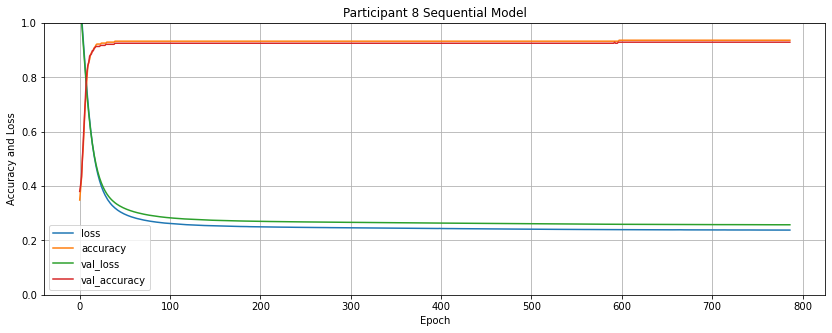

In [26]:
import pandas as pd

pd.DataFrame(history7.history).plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Participant 8 Sequential Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loss")
plt.show()

In [27]:
model7.evaluate(x7_val, y7_val)

8/8 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.9294


[0.25761309266090393, 0.929411768913269]

In [28]:
model7.evaluate(x7_test, y7_test)

117/117 [==============================] - 0s 1ms/step - loss: 0.9653 - accuracy: 0.6630


[0.9652959704399109, 0.6630085706710815]

#### Model for Participant 7

In [29]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Flatten(input_shape=[3, 1]))
model6.add(keras.layers.Dense(3, activation="tanh"))
model6.add(keras.layers.Dense(3, activation="tanh"))
model6.add(keras.layers.Dense(3, activation="softmax"))
model6.output_shape

(None, 3)

In [30]:
model6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [31]:
output6 = model6.layers[3]

In [32]:
early_stopping_cb6 = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

checkpoint_cb6 = keras.callbacks.ModelCheckpoint("best.h5", save_best_only=True)

opt6 = keras.optimizers.Adam() #learning_rate = 0.001

model6.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt6,
              metrics=["accuracy"])

model6.evaluate(x6_test, y6_test)

117/117 [==============================] - 0s 1ms/step - loss: 1.4040 - accuracy: 0.1871


[1.4040465354919434, 0.18709850311279297]

In [33]:
history6 = model6.fit(X6_train, y6_train, epochs=1000,
                    validation_data=(x6_val, y6_val),
                    callbacks=[checkpoint_cb6,early_stopping_cb6])

Epoch 1/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9835 - accuracy: 0.1444 - val_loss: 0.9825 - val_accuracy: 0.1647
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.9565 - accuracy: 0.1796 - val_loss: 0.9565 - val_accuracy: 0.2039
Epoch 3/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.9307 - accuracy: 0.2570 - val_loss: 0.9313 - val_accuracy: 0.3020
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.9055 - accuracy: 0.3838 - val_loss: 0.9070 - val_accuracy: 0.6353
Epoch 5/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.8811 - accuracy: 0.8592 - val_loss: 0.8833 - val_accuracy: 0.8902
Epoch 6/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.8575 - accuracy: 0.9014 - val_loss: 0.8599 - val_accuracy: 0.8902
Epoch 7/1000
9/9 [==============================] - 0s 34ms/step - loss: 0.8338 - accuracy: 0.9014 - val_loss: 0.8369 - val_accuracy: 0.8902
Epoch 8/1000


Epoch 59/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.3310 - accuracy: 0.9261 - val_loss: 0.3512 - val_accuracy: 0.9176
Epoch 60/1000
9/9 [==============================] - 0s 18ms/step - loss: 0.3291 - accuracy: 0.9261 - val_loss: 0.3493 - val_accuracy: 0.9176
Epoch 61/1000
9/9 [==============================] - 0s 16ms/step - loss: 0.3272 - accuracy: 0.9261 - val_loss: 0.3475 - val_accuracy: 0.9176
Epoch 62/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.3254 - accuracy: 0.9261 - val_loss: 0.3458 - val_accuracy: 0.9176
Epoch 63/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.3237 - accuracy: 0.9261 - val_loss: 0.3441 - val_accuracy: 0.9176
Epoch 64/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.3221 - accuracy: 0.9261 - val_loss: 0.3426 - val_accuracy: 0.9176
Epoch 65/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.3205 - accuracy: 0.9261 - val_loss: 0.3411 - val_accuracy: 0.9176
Epoch 

9/9 [==============================] - 0s 18ms/step - loss: 0.2737 - accuracy: 0.9261 - val_loss: 0.2953 - val_accuracy: 0.9176
Epoch 174/1000
9/9 [==============================] - 0s 17ms/step - loss: 0.2736 - accuracy: 0.9261 - val_loss: 0.2952 - val_accuracy: 0.9176
Epoch 175/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2735 - accuracy: 0.9261 - val_loss: 0.2951 - val_accuracy: 0.9176
Epoch 176/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2734 - accuracy: 0.9261 - val_loss: 0.2950 - val_accuracy: 0.9176
Epoch 177/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2733 - accuracy: 0.9261 - val_loss: 0.2949 - val_accuracy: 0.9176
Epoch 178/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2732 - accuracy: 0.9261 - val_loss: 0.2948 - val_accuracy: 0.9176
Epoch 179/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2731 - accuracy: 0.9261 - val_loss: 0.2947 - val_accuracy: 0.9176
Epoch 180/1000

9/9 [==============================] - 0s 11ms/step - loss: 0.2664 - accuracy: 0.9261 - val_loss: 0.2878 - val_accuracy: 0.9176
Epoch 288/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2664 - accuracy: 0.9261 - val_loss: 0.2878 - val_accuracy: 0.9176
Epoch 289/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2663 - accuracy: 0.9261 - val_loss: 0.2878 - val_accuracy: 0.9176
Epoch 290/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2663 - accuracy: 0.9261 - val_loss: 0.2877 - val_accuracy: 0.9176
Epoch 291/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2662 - accuracy: 0.9261 - val_loss: 0.2877 - val_accuracy: 0.9176
Epoch 292/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2662 - accuracy: 0.9261 - val_loss: 0.2877 - val_accuracy: 0.9176
Epoch 293/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2663 - accuracy: 0.9261 - val_loss: 0.2877 - val_accuracy: 0.9176
Epoch 294/1000
9

9/9 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.9261 - val_loss: 0.2851 - val_accuracy: 0.9176
Epoch 402/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2636 - accuracy: 0.9261 - val_loss: 0.2850 - val_accuracy: 0.9176
Epoch 403/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.2636 - accuracy: 0.9261 - val_loss: 0.2849 - val_accuracy: 0.9176
Epoch 404/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2638 - accuracy: 0.9261 - val_loss: 0.2849 - val_accuracy: 0.9176
Epoch 405/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.9261 - val_loss: 0.2849 - val_accuracy: 0.9176
Epoch 406/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.9261 - val_loss: 0.2849 - val_accuracy: 0.9176
Epoch 407/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.9261 - val_loss: 0.2850 - val_accuracy: 0.9176
Epoch 408/1000
9/9 

9/9 [==============================] - 0s 12ms/step - loss: 0.2622 - accuracy: 0.9261 - val_loss: 0.2836 - val_accuracy: 0.9176
Epoch 516/1000
9/9 [==============================] - 0s 14ms/step - loss: 0.2622 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9176
Epoch 517/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2622 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9176
Epoch 518/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2622 - accuracy: 0.9261 - val_loss: 0.2836 - val_accuracy: 0.9176
Epoch 519/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.2622 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9176
Epoch 520/1000
9/9 [==============================] - 0s 20ms/step - loss: 0.2621 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9176
Epoch 521/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.2621 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9176
Epoch 522/1000
9/9

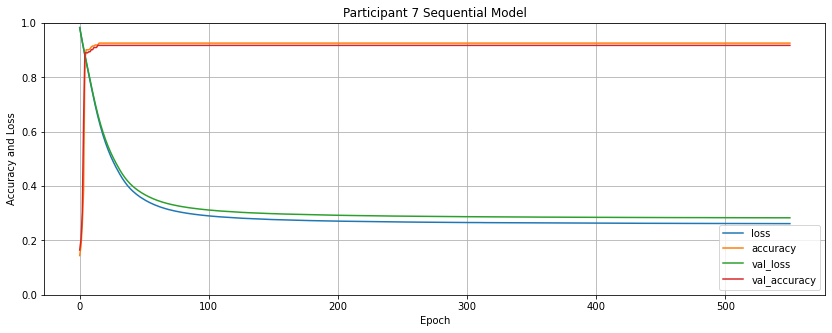

In [34]:
import pandas as pd

pd.DataFrame(history6.history).plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Participant 7 Sequential Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy and Loss")
plt.show()

In [35]:
model6.evaluate(x6_val, y6_val)

8/8 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9176


[0.28322792053222656, 0.9176470637321472]

In [36]:
model6.evaluate(x6_test, y6_test)

117/117 [==============================] - 0s 2ms/step - loss: 1.1125 - accuracy: 0.5940


[1.1124541759490967, 0.5939507484436035]